File to train the deep learning model on new data

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, Image
from os import getcwd
from PIL import Image as PILImage
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import shutil
import random
import glob

In [86]:
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off')

In [87]:
image_dir = "Images/pool/training/images/"
annotation_dir = "Images/pool/training/labels/"
annotation_files = ["000002764.xml", "000002041.xml", "000000186.xml"]

In [88]:
# Parse XML file
def parse_xml(file):
    tree = ET.parse(file)
    root = tree.getroot()

    file_dict = {}

    file_dict["filename"] = root.find('filename').text
    file_dict["height"] = root.find("size/height").text
    file_dict["width"] = root.find("size/width").text

    list_with_all_boxes = []
    for boxes in root.iter('object'):
        
        
        ymin, xmin, ymax, xmax = None, None, None, None
        
        ymin = round(float(boxes.find("bndbox/ymin").text))
        xmin = round(float(boxes.find("bndbox/xmin").text))
        ymax = round(float(boxes.find("bndbox/ymax").text))
        xmax = round(float(boxes.find("bndbox/xmax").text))

        obj = {
            "bbox": [xmin, ymin, xmax, ymax],
            "category_id": 0,
        }
        list_with_all_boxes.append(obj)
    file_dict["annotations"] = list_with_all_boxes
    return file_dict

def parse_dir_xml(dir):
    fichiers = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    dataset_dicts = []

    for data in fichiers:
        record = parse_xml(os.path.join(annotation_dir, data))
        dataset_dicts.append(record)
    
    return dataset_dicts

# Visualize image with bounding boxes
def visualize_image(image_folder, annotation_folder, annotation_file):
    data = parse_xml(os.path.join(annotation_folder, annotation_file))

    img = cv2.imread(os.path.join(image_folder, data["filename"]))

    for box in data["annotations"]:
        cv2.rectangle(img, (box["bbox"][0], box["bbox"][1]), (box["bbox"][2], box["bbox"][3]), (0, 255, 0), 2)
    
    cv2_imshow(img)

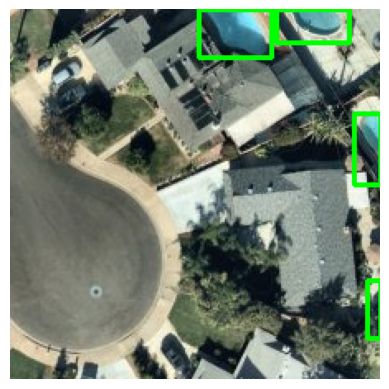

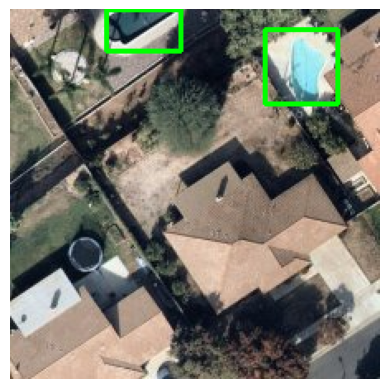

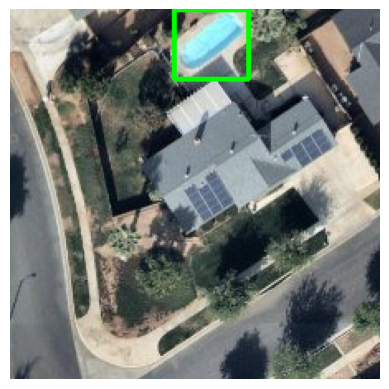

In [89]:
for ann_file in annotation_files:
    visualize_image(image_dir, annotation_dir, ann_file)

In [90]:
import json
def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                # "bbox_mode": BoxMode.XYXY_ABS,
                # "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

dataset = get_balloon_dicts("Images/balloon/train/")

FileNotFoundError: [Errno 2] No such file or directory: 'balloon/train/via_region_data.json'

In [ ]:
dataset

[{'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
  'image_id': 0,
  'height': 1536,
  'width': 2048,
  'annotations': [{'bbox': [994, 619, 1445, 1166], 'category_id': 0}]},
 {'file_name': 'balloon/train/25899693952_7c8b8b9edc_k.jpg',
  'image_id': 1,
  'height': 1365,
  'width': 2048,
  'annotations': [{'bbox': [135, 115, 811, 965], 'category_id': 0}]},
 {'file_name': 'balloon/train/24362039530_b151b41a52_k.jpg',
  'image_id': 2,
  'height': 2048,
  'width': 1536,
  'annotations': [{'bbox': [579, 487, 920, 921], 'category_id': 0}]},
 {'file_name': 'balloon/train/18849792632_aad23ad513_k.jpg',
  'image_id': 3,
  'height': 2048,
  'width': 1536,
  'annotations': [{'bbox': [534, 365, 871, 811], 'category_id': 0},
   {'bbox': [795, 457, 1013, 805], 'category_id': 0},
   {'bbox': [823, 619, 1161, 1064], 'category_id': 0},
   {'bbox': [564, 803, 907, 1245], 'category_id': 0},
   {'bbox': [805, 991, 1122, 1364], 'category_id': 0},
   {'bbox': [600, 1219, 822, 1575], 'category_id':